# 3.3: Practice "long" and "wide" data formats

In this lesson we are going to practice going between long and wide formats using pandas.

Recall that **long format:**

- Has potentially multiple "id" (identification) columns.
- Has a single value column that is described by the id columns.
- When converted from wide format, there is a "variable" column that is one of the id columns. This "variable" column corresponds to the multiple columns in your wide format you wanted converted into one "variable" id column and one "value" column.
- Is a standard format in SQL databases.

And **wide format:**

- Can have multiple ID _and_ value columns.
- Trades off the simplicity of a single value column for a more compact matrix.
- Is not useful in SQL because it is harder to join tables (more on this later).
- Can be more useful in pandas because operations due to operations across columns.

---

## A: Humor styles dataset

We are going to explore a dataset where people answered a questionnaire on their "humor styles", which tries to get at differences in people's sense of humor and their relationship with humor.

---

### A.1: The 32 questions

Subjects answered **32** different questions outlined below:

1. I usually don't laugh or joke with other people.
2. If I feel depressed, I can cheer myself up with humor.
3. If someone makes a mistake, I will tease them about it.
4. I let people laugh at me or make fun of me at my expense more than I should.
5. I don't have to work very hard to make other people laugh. I am a naturally humorous person.
6. Even when I'm alone, I am often amused by the absurdities of life.
7. People are never offended or hurt by my sense of humor.
8. I will often get carried away in putting myself down if it makes family or friends laugh.
9. I rarely make other people laugh by telling funny stories about myself.
10. If I am feeling upset or unhappy I usually try to think of something funny about the situation to make myself feel better.
11. When telling jokes or saying funny things, I am usually not concerned about how other people are taking it.
12. I often try to make people like or accept me more by saying something funny about my own weaknesses, blunders, or faults.
13. I laugh and joke a lot with my closest friends.
14. My humorous outlook on life keeps me from getting overly upset or depressed about things.
15. I do not like it when people use humor as a way of criticizing or putting someone down.
16. I don't often say funny things to put myself down.
17. I usually don't like to tell jokes or amuse people.
18. If I'm by myself and I'm feeling unhappy, I make an effort to think of something funny to cheer myself up.
19. Sometimes I think of something that is so funny that I can't stop myself from saying it, even if it is not appropriate for the situation.
20. I often go overboard in putting myself down when I am making jokes or trying to be funny.
21. I enjoy making people laugh.
22. If I am feeling sad or upset, I usually lose my sense of humor.
23. I never participate in laughing at others even if all my friends are doing it.
24. When I am with friends or family, I often seem to be the one that other people make fun of or joke about.
25. I donít often joke around with my friends.
26. It is my experience that thinking about some amusing aspect of a situation is often a very effective way of coping with problems.
27. If I don't like someone, I often use humor or teasing to put them down.
28. If I am having problems or feeling unhappy, I often cover it up by joking around, so that even my closest friends don't know how I really feel.
29. I usually can't think of witty things to say when I'm with other people.
30. I don't need to be with other people to feel amused. I can usually find things to laugh about even when I'm by myself.
31. Even if something is really funny to me, I will not laugh or joke about it if someone will be offended.
32. Letting others laugh at me is my way of keeping my friends and family in good spirits.

That's a lot of questions!

---

### A.2: Response codes

For each question, there are 5 possible response codes ("likert scale") that correspond to different answers. There is also a code that indicates there is no response for that subject.

    1 == "Never or very rarely true"
    2 == "Rarely true"
    3 == "Sometimes true"
    4 == "Often true"
    5 == "Very often or always true
    [-1 == Did not select an answer]

---

[For more info: https://en.wikipedia.org/wiki/Humor_styles]

---

## B: Load modules

Let's load the standard modules we always use. None of these are new to you.

---

In [54]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# make sure charts appear in the notebook:
%matplotlib inline

---

## C: Loading and examining the data

The dataset as usual is stored in your **```assets/datasets```** directory.

The dataset is called **```hsq_data.csv```**. "hsq", as you might expect, stands for "humor styles questionnaire.

[There is also a file called **```hsq_codebook.txt```** which is a text file that contains the information I detailed above. You can examine it if you like.]

---

### C.1: Create path string and load into pandas

In [55]:
hsq = pd.read_csv('../assets/datasets/hsq_data.csv')

---

### C.2 Look at the header.

Let's make sure it looks like what we expect and the data didn't load in incorrectly. This is, of course, always good practice.

In [56]:
hsq.head(1)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100


Looking at the head it's apparent we have **32 columns for each question**, but if we scroll over to the right we can see that there are **7 columns of subject properties**.

What are these properties? Some are clear and some are not.

#### Styles of humor:

1. **affiliative**
    - The style of humor used to enhance one's relationships with others in a positive and benevolent way. 
2. **selfenhancing** 
    - The style of humor related to having a good-natured attitude toward life, having the ability to laugh at yourself, your circumstances and the idiosyncrasies of life in constructive, non-detrimental manner.
3. **aggressive** 
    - The style of humor that is potentially detrimental towards others. This type of humor is characterized by the use of sarcasm, put-downs, teasing, criticism, ridicule, and other types of humor used at the expense of others.   
4. **selfdefeating** 
    - The style of humor characterized by the use of potentially detrimental humor towards the self in order to gain approval from others. Individuals high in this dimension engage in self-disparaging humor in which laughter is often at their own expense.
    
These are dimensions of humor calculated from the question responses. 

- The two positive dimensions of humore are: **affiliative** and **selfenhancing**. 
- The two _(purportedly)_ negative dimensions of humor are: **aggressive** and **selfdefeating**.

We are going to calculate these manually later to practice column-wise operations in pandas.

---

#### Demographics and self-reported accuracy

The demographic columns are:

- **age**
- **gender**
    - 1 == male
    - 2 == female
    - 3 == other

Demographics are great to have for each subject in a dataset. We will see the reasons for this later when we start doing regressions and classification.

The **accuracy** column is the self-reported accuracy of the questions by the subjects. It is how accurate they thought their answers were on a scale from 0 to 100.

**If a subject entered 0 for accuracy, this actually means they did not want to be included in research.**

---

### C.3: Data shape

Lets start to take a look at our data. Print out the shape of the DataFrame.

In [57]:
hsq.shape

(1071, 39)

**C.3.1:** What does the shape mean? What does it tell us for this dataset?

Has 39 columns, 1071 rows. Was answered 1071 times

**C.3.1.A:** 

---

### C.4: Describe the data

**C.4.1** Print out the names of the columns. You can see that aggressive is misspelled "agressive". Replace that column specifically using the ```.rename()``` built-in function. 

In [58]:
pd.DataFrame(columns=hsq.columns.values)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy


In [59]:
hsq.rename(columns={"agressive": "aggressive"},inplace=True)

"""hsq_tmp = hsq.replace({
        col:col.replace('Q','Question')
        for col in hsq.columns.values
        if all([
                True if char in ['Q','1','2','3','4','5','6','7','8','9','0']
                else False
                for char in col
            ])
    })"""

"hsq_tmp = hsq.replace({\n        col:col.replace('Q','Question')\n        for col in hsq.columns.values\n        if all([\n                True if char in ['Q','1','2','3','4','5','6','7','8','9','0']\n                else False\n                for char in col\n            ])\n    })"

In [60]:
hsq.head(1)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100


In [61]:
hsq.tail(1)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
1070,4,2,1,3,3,5,3,2,4,3,...,4,3,1,3.4,3.0,3.0,2.5,30,2,75


**C.4.2** Use the describe built-in function to look at the data

In [62]:
hsq.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,...,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,2.025210,3.342670,3.078431,2.833800,3.599440,4.152194,3.277311,2.535014,2.582633,2.869281,...,3.945845,2.767507,2.838469,4.010644,3.375537,2.956583,2.762745,70.966387,1.455649,87.542484
std,1.075782,1.112898,1.167877,1.160252,1.061281,0.979315,1.099974,1.231380,1.224530,1.205013,...,1.135189,1.309601,1.233889,0.708479,0.661533,0.410870,0.645982,1371.989249,0.522076,12.038483
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,1.300000,0.000000,0.000000,0.000000,14.000000,0.000000,2.000000
25%,1.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,3.600000,2.900000,2.800000,2.300000,18.500000,1.000000,80.000000
50%,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,...,4.000000,3.000000,3.000000,4.100000,3.400000,3.000000,2.800000,23.000000,1.000000,90.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000,...,5.000000,4.000000,4.000000,4.500000,3.800000,3.300000,3.100000,31.000000,2.000000,95.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.100000,5.000000,5.000000,5.000000,44849.000000,3.000000,100.000000


**C.4.3** Do you spot anything wrong or suspicious about the data?

**C.4.3.A** 

**C.4.4** Calculate and print just the standard deviation for the columns.

In [63]:
# pd.DataFrame?(hsq.std(axis=0))

hsq.apply(np.std, axis = 0)

Q1                  1.075280
Q2                  1.112378
Q3                  1.167331
Q4                  1.159710
Q5                  1.060785
Q6                  0.978858
Q7                  1.099460
Q8                  1.230805
Q9                  1.223958
Q10                 1.204450
Q11                 1.249403
Q12                 1.229015
Q13                 0.884552
Q14                 1.269906
Q15                 1.377542
Q16                 1.213952
Q17                 1.147102
Q18                 1.205897
Q19                 1.258174
Q20                 1.122841
Q21                 0.968370
Q22                 1.241046
Q23                 1.221006
Q24                 1.148111
Q25                 0.885473
Q26                 1.205932
Q27                 1.290498
Q28                 1.318124
Q29                 1.209791
Q30                 1.134659
Q31                 1.308990
Q32                 1.233313
affiliative         0.708148
selfenhancing       0.661224
aggressive    

**C.4.5** List three interesting things about the standard deviation  values in the context of our data.

1. Most questions have relatively similar ranges, not much 

**C.4.5.A**

**C.4.6** Using seaborn, plot the distribution for Q15 and plot the distribution for aggressive

[Note: ```sns.set(rc={"figure.figsize": (12, 12)})``` entered before the distribution plot will set the figure size to 12x12 for example.]

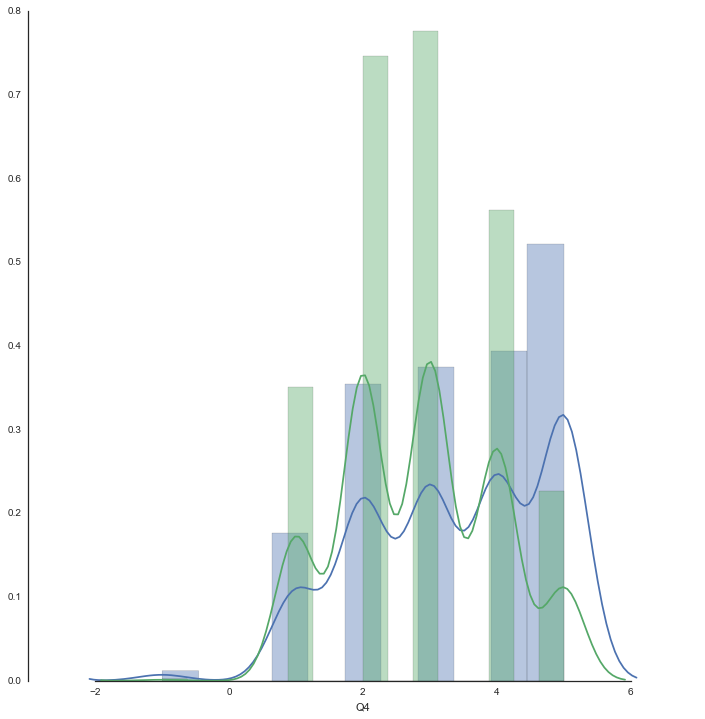

In [64]:
sns.set(style='white',rc={"figure.figsize": (12,12)})
sns.distplot(hsq['Q15'])
sns.distplot(hsq['Q4'])
sns.despine(trim=True)

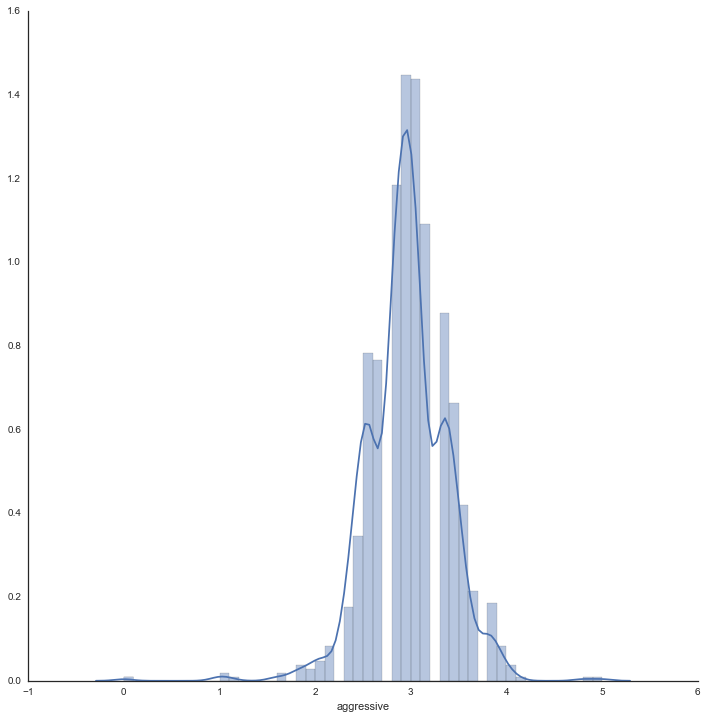

In [65]:
sns.distplot(hsq['aggressive'])
sns.despine(trim=True)

**C.4.7** Having seen the distributions, what does it look like is causing the difference in standard deviation?

**C.4.7.A** 

---

## D: Convert the data from "wide" to "long"

### D.1: Make the question columns clearer

**D.1.1** Before we transform our DataFrame to long format, we should make the questions more descriptive so that we know what they are referring to. Use the provided dictionary of question numbers and names to transform the column labels.

In [66]:
column_change = {
    'Q1':'usually_dont_laugh',
    'Q2':'if_depressed_use_humor',
    'Q3':'tease_others_mistakes',
    'Q4':'let_others_laugh_at_me',
    'Q5':'make_others_laugh_easy',
    'Q6':'when_alone_amused',
    'Q7':'my_humor_never_offensive',
    'Q8':'use_self_deprecation',
    'Q9':'rarely_make_laugh_stories',
    'Q10':'if_upset_use_humor',
    'Q11':'dont_care_impact_jokes',
    'Q12':'self_deprecate_to_befriend',
    'Q13':'laugh_alot_with_friends',
    'Q14':'humorous_outlook_improves_mood',
    'Q15':'dislike_mean_humor',
    'Q16':'dont_self_deprecate',
    'Q17':'dont_like_telling_jokes',
    'Q18':'when_alone_try_laugh',
    'Q19':'joke_when_inappropriate',
    'Q20':'harshly_self_deprecate',
    'Q21':'enjoy_making_others_laugh',
    'Q22':'if_sad_cant_laugh',
    'Q23':'never_use_mean_humor',
    'Q24':'friends_often_tease_me',
    'Q25':'dont_often_joke',
    'Q26':'humor_coping_mechanism',
    'Q27':'tease_disliked_people',
    'Q28':'hide_unhappiness_humor',
    'Q29':'cant_think_witty_things',
    'Q30':'dont_need_others_amused',
    'Q31':'if_mean_wont_laugh',
    'Q32':'allow_others_tease_me'
}

In [67]:
for key in column_change.keys():
    hsq.rename(columns={key: column_change[key]})

**D.1.2** Print out the columns and take a look at the header to make sure the columns were renamed.

---

### D.2: Add a subject ID column

We have an index which identifies the rows, but we are going to want a column that is the ID for each subject so that we can keep track of which rows correspond to which subject.

If this is not clear, don't worry. The reason we are doing this will become clear when we look at the long-form data visually.

**D.2.1** Create an "ID" array that is the length of the rows in our data and where each element is unique.

[NOTE: Don't call this variable "id", as this is reserved. In jupyter notebook, when a variable you are typing gets colored green, you should make it a different name as that is a reserved name.]

In [68]:
df_id = np.arange(0,len(hsq))

**D.2.2** Add a new column to your dataset that is the values of this subject_ids array called "subject_id".

In [69]:
hsq['subject_ids'] = df_id

hsq.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy,subject_ids
0,2,2,3,1,4,5,4,3,4,3,...,2,2,4.0,3.5,3.0,2.3,25,2,100,0
1,2,3,2,2,4,4,4,3,4,3,...,3,1,3.3,3.5,3.3,2.4,44,2,90,1
2,3,4,3,3,4,4,3,1,2,4,...,4,2,3.9,3.9,3.1,2.3,50,1,75,2
3,3,3,3,4,3,5,4,3,-1,4,...,3,3,3.6,4.0,2.9,3.3,30,2,85,3
4,1,4,2,2,3,5,4,1,4,4,...,4,2,4.1,4.1,2.9,2.0,52,1,80,4


---

### D.3: Transform the data to long format

We are now going to transform our dataset from **wide** to **long** format.

The pandas function to convert a wide dataset to a long dataset is **```pd.melt()```**

Here is an example call of the function:

```python
id_theft_long = pd.melt(id_theft_wide,
                        id_vars=['full_name','birth_date'],
                        value_vars=['ccv','zip_code','credit_card_number','pin','ssn'],
                        var_name='personal_info',
                        value_name='info_value')
```

So, what are the inputs to this function?

- **```id_theft_wide```:** this is my wide format dataset with peoples personal info.
- **```id_vars```:** these are the columns that are _already identifiers_ or can otherwise not be in value_vars because it is a different data type.
- **```value_vars```:** these are the columns that are going to be now represented in a single value column.
- **```var_name```:** this is the name of the new, single column that will have the identifiers for each value by row. _The value_var columns are now represented in a single column._
- **```value_name```:** this is the name of the new, single column that has the values from the value_vars columns.

**D.3.1** Convert your dataset to long format assigned to a new DataFrame.

- Your id_vars will be:
    - subject_id
    - age
    - gender
- Your ```value_vars``` will be the names of your question, accuracy, and four humor styles columns.
- Make ```var_name``` "variable"
- Make ```value_name``` "value"


In [70]:
hsq_long = pd.melt(hsq,
                id_vars=['subject_ids','age','gender'],
                var_name='variable',
                value_name='value')

**D.3.2** Look at the header. Print the shape of the long DataFrame as well as the unique values in the "variable" column.

In [71]:
hsq_long.head(2)

,subject_ids,age,gender,variable,value
0,0,25,2,Q1,2.0
1,1,44,2,Q1,2.0


In [72]:
hsq_long.shape # see shape has changed

(39627, 5)

**D.3.3** Print the entire subset of the DataFrame where ```subject_id == 10```

In [73]:
hsq_long[hsq_long['subject_ids']==10]

,subject_ids,age,gender,variable,value
10,10,33,1,Q1,1.0
1081,10,33,1,Q2,5.0
2152,10,33,1,Q3,1.0
3223,10,33,1,Q4,3.0
4294,10,33,1,Q5,4.0
5365,10,33,1,Q6,5.0
6436,10,33,1,Q7,4.0
7507,10,33,1,Q8,3.0
8578,10,33,1,Q9,2.0
9649,10,33,1,Q10,5.0


**D.3.4** Explain why the row index for the subset is increasing, but there is such a big difference between them for subject 10.

Because going through each of the items in variables and grouping them together, 

**D.3.4.A** 

**D.3.5** Devise a way to have the index ordered by subject_id. You're likely going to need to look it up on google. Get used to it!

In [74]:
hsq_long.sort_values(['subject_ids'], inplace=True)

In [75]:
hsq_long.head(2)

,subject_ids,age,gender,variable,value
0,0,25,2,Q1,2.0
25704,0,25,2,Q25,1.0


---

## E: Clean dataset and transform variables

Transformation and manipulation of variables within subsets of your data is an essential data science skill!

Cleaning is also essential. Cleaning data means removing "bad" data or any data that should be excluded from your analyses.

### E.1: Convert the gender column to a string representation

Recall that:
    
    1 == 'male'
    2 == 'female'
    3 == 'other'

Let's make gender more readable. Convert the numeric gender column to a string column with the gender labels.

In [76]:
def coltostr(num):
    if num == 1:
        return 'male'
    elif num == 2:
        return 'female'
    elif num == 3:
        return 'other'

hsq_long['gender'] = hsq_long['gender'].map(coltostr)

In [77]:
hsq_long

,subject_ids,age,gender,variable,value
0,0,25,female,Q1,2.0
25704,0,25,female,Q25,1.0
13923,0,25,female,Q14,4.0
18207,0,25,female,Q18,3.0
21420,0,25,female,Q21,4.0
32130,0,25,female,Q31,2.0
7497,0,25,female,Q8,3.0
10710,0,25,female,Q11,3.0
9639,0,25,female,Q10,3.0
29988,0,25,female,Q29,2.0


---

### E.2: Removing subjects from the dataset

**E.2.1** Users that did not respond to certain questions are going to have potentially unreasonable values for their humor style ratings. 

Find the users that responded ```-1``` on any of the questions.

In [78]:
mask = hsq_long.variable.isin(['Q'+str(x) for x in range(1,33)])
#print mask[0:20]

hsq_question_values = hsq_long.ix[mask, ['variable', 'value','subject_ids']]
hsq_question_values[0:20]

bad_users = hsq_question_values[hsq_question_values.value == -1]

bad_users = bad_users.subject_ids.unique()

print bad_users

[   3   12   25   45   55   59   85  107  117  121  149  164  178  189  221
  236  261  264  289  315  350  354  375  435  447  449  451  465  481  490
  498  500  501  504  526  528  529  534  535  551  590  604  611  633  638
  646  648  655  681  683  693  696  704  715  723  730  758  770  773  778
  787  806  813  857  878  894  897  954  958  979  983 1004 1009 1025 1037
 1043 1047 1052]


**E.2.2** Remove all rows from the datasets corresponding to the bad users.

HINTS:
    
- The **```~```** operator can invert a logical condition/boolean array.
- The **```.isin()```** built-in function takes a list of values and returns a boolean array that indicates whether any of the Series or DataFrame values were a member of the list.
    

**E.2.3** Recall that subjects who entered 0 for accuracy are actually requesting to not be part of the research. Respecting their wishes, check if any subjects entered 0 for accuracy and remove them.

**E.2.4** Find the subject that reported an age over 100 and remove them, because they're almost certainly lying.

In [83]:
mask = hsq_long.age > 100

old_subjects = hsq_long[mask]

old_subjects.head()

,subject_ids,age,gender,variable,value
15287,293,242,male,Q15,3.0
29210,293,242,male,Q28,4.0
5648,293,242,male,Q6,5.0
12074,293,242,male,Q12,4.0
30281,293,242,male,Q29,3.0


In [84]:
old_subjects = old_subjects.subject_ids.unique()

print old_subjects

[293 303 632 957]


In [86]:
"""
ages = hsq_long.age[0:10]
print ~(ages > 25)
"""

hsq_long = hsq_long[~(hsq_long.subject_ids.isin(old_subjects))]

In [89]:
hsq_long.head()

,subject_ids,age,gender,variable,value
0,0,25,female,Q1,2.0
25704,0,25,female,Q25,1.0
13923,0,25,female,Q14,4.0
18207,0,25,female,Q18,3.0
21420,0,25,female,Q21,4.0


---

### E.3: Transform variables (invert some)

Some of the scales need to be reversed. We will transform variables so that the valence of the 1-5 likert scale is always going from negative valence to positive valence.

For example the scale for this question is already correctly rated from 1 to 5:

    Even if I'm by myself, I'm often amused by the absurdity of life.
    
And this is one that needs to be reversed, since the 1 value actually corresponds to a positive humor style:

    I usually don't laugh or joke around much with other people.
    
Below is a list of the questions that need to be inverted.

In [ ]:
inverted_questions = ['usually_dont_laugh',
                      'tease_others_mistakes',
                      'let_others_laugh_at_me',
                      'rarely_make_laugh_stories',
                      'use_self_deprecation',
                      'tease_disliked_people',
                      'cant_think_witty_things',
                      'allow_others_tease_me',
                      'harshly_self_deprecate',
                      'dont_often_joke',
                      'if_sad_cant_laugh',
                      'dont_like_telling_jokes',
                      'dont_care_impact_jokes',
                      'self_deprecate_to_befriend',
                      'friends_often_tease_me',
                      'joke_when_inappropriate']

**E.3.1** Write a function that will accept a score value and "invert" the score. That is to say:

    1 -> 5
    2 -> 4
    3 -> 3
    4 -> 2
    5 -> 1

**E.3.2** Apply the score inverter function to the values where the variable is in the ```inverted_question``` list, reassigning the ```value``` column at those locations.

Don't forget about the ```.isin()``` function for Series as well as the ```.map()``` or ```.apply()``` functions for element-wise operations on a Series!

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html

http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.apply.html

---

## F: Transforming the dataset back to wide format

Now we will transform the DataFrame in long format back to wide format.

We are going to be using the powerful **```pd.pivot_table()```** function. 

---

### F.1: Use pd.pivot_table() to re-widen your data

The ```pd.pivot_table()``` function takes a variety of arguments. For now, lets just set the keyword arguments and corresponding values outlined below:

- **data** The first argument is your DataFrame you are going to pivot.

- **index** is the key or keys to group by along the pivot table indices, or rows. These "keys" are column names in your DataFrame:

```python
index = ['subject_id','age','gender']
```

- **columns** is the key or keys to group by along the pivot table columns. These are also column names or a name:

```python
columns = ['variable']
```

- **values** is the key or keys that are the values to "aggregate". More on aggregation soon, but don't worry about it right now.

```python
values = ['value']
```

**F.1.1** Create a new widened DataFrame from your long data using the specified keyword arguments above. Print out the head and the shape as well.

In [95]:
hsq_wide = pd.pivot_table(hsq_long, index=['subject_ids','age','gender'],columns=['variable'],values=['value'])

In [96]:
hsq_wide.head(2)

value                                               \
variable                  Q1  Q10  Q11  Q12  Q13  Q14  Q15  Q16  Q17  Q18   
subject_ids age gender                                                      
0           25  female   2.0  3.0  3.0  1.0  5.0  4.0  4.0  4.0  2.0  3.0   
1           44  female   2.0  3.0  4.0  3.0  3.0  4.0  5.0  4.0  2.0  2.0   

                            ...                                         \
variable                    ...        Q5   Q6   Q7   Q8   Q9 accuracy   
subject_ids age gender      ...                                          
0           25  female      ...       4.0  5.0  4.0  3.0  4.0    100.0   
1           44  female      ...       4.0  4.0  4.0  3.0  4.0     90.0   

                                                                           
variable               affiliative aggressive selfdefeating selfenhancing  
subject_ids age gender                                                     
0           25  female         4.0        3.0           2.3           3.5  
1           44  female         3.3        3.3           2.4           3.5  

[2 rows x 37 columns]

This looks different than our original wide dataset, and is going to take some explaining for sure.

This is what pandas calls alternatively **hierarchical indexing** or just **MultiIndex**.

Look up at the top left corner of the header. You can see now that there are **multiple levels to both the index (rows) and the column headers.** This is what is meant by hierarchical or "multi" indexing.

- under the super-index "variable" are sub-indices "subject_id", "age", and "gender"
- under the super-header "value" are sub-headers that are all the unique values previously in the "variable" column of our long-form DataFrame



---

### F.2: Understanding the MultiIndex

The MultiIndex at first appears daunting and confusing. What is it? How do we use it?

**F.2.1** Print out the columns of your wide dataset.

In [101]:
hsq_wide.columns

MultiIndex(levels=[[u'value'], [u'Q1', u'Q10', u'Q11', u'Q12', u'Q13', u'Q14', u'Q15', u'Q16', u'Q17', u'Q18', u'Q19', u'Q2', u'Q20', u'Q21', u'Q22', u'Q23', u'Q24', u'Q25', u'Q26', u'Q27', u'Q28', u'Q29', u'Q3', u'Q30', u'Q31', u'Q32', u'Q4', u'Q5', u'Q6', u'Q7', u'Q8', u'Q9', u'accuracy', u'affiliative', u'aggressive', u'selfdefeating', u'selfenhancing']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]],
           names=[None, u'variable'])

The columns before was just a list of the column names, but now there are three attributes:

- **levels** is the list of lists that contains the hierarchy of header labels
- **labels** is the list of lists that specifies which level label goes in which position at each hierarchical level
- **names** are the names of the hierarchical header levels

**F.2.2** Print out the ```.columns.names``` property specifically

In [102]:
hsq_wide.columns.names

FrozenList([None, u'variable'])

The name for the second level is "variable", and the first (top) level has ```None```: no name.

Why is the top level ```None```? 

The name "variable" is indicating the category, so to speak, of the bottom level header labels. Looking at the ```.head()``` printout, you can see that the "variable" is just to the left of all the bottom level headers. The **name of that level is "variable"** (which is the column they were pulled out of in the long data).

The upper level, "value", has no name because there aren't tiers above it and pandas chooses to not give it a name! 

The names are just convenience anyway, since you **index by labels**.

---

Still confused? Think of it this way: the "value" label at the top spans all the columns and corresponds to the values in the cells of the columns. 

Remember how the variable and value columns in the long data looked?

```
variable       value
--------       -----
accuracy       100
accuracy       80
selfdefeating  2.2
selfenhancing  3.1
selfdefeating  1.1
...
```

**"value" is the top level in the header hierarchy because the unique "variable" column items correspond to a subset of the "value" column numbers.**

---

**F.2.3** Print out the ```.index.names``` property of your wide data

We see that there are 3 named indices. This corresponds to the leftmost part of the ```.head()``` we printed out before: you can see 3 bolded columns that are indices with these titles.

Before moving on to indexing, we can actually easily get rid of that useless "value" header.

**F.2.4** Reassign your wide data to the wide data pulling out column value. As in:

```python
hsq_wide = hsq_wide['value']
```

Then print the dataset and print the columns attribute to see how it gets rid of the hierarchical header.

---

### F.3: Indexing with a MultiIndex

pandas provides many different ways you can index your DataFrame when it has a MultiIndex. I am just going to go over three, which are the ones I find most intuitive in order:

1. Using **```.xs()```** which is the "cross-section" indexing function
2. Using a **```pd.IndexSlice```** object
3. Using the **```.query()```** function

Let's start with the cross-section function.

**F.3.1** Type the following (replacing hsq_wide with your wide DataFrame name):

```python
hsq_wide.xs(3, level='subject_id')
```

**F.3.2** What did the cross-section function pull out using these parameters? Explain what cross-section is doing here.

**F.3.2.A** 

**F.3.3** Type the following python and explain what is happening and why:

```python
hsq_wide.xs((21, 'male'), level='subject_id', axis=0, drop_level=False)[['aggressive','affiliative']]
```

**F.3.3.A** 

**F.3.4** What is the limitation of the cross-section function?

**F.3.4.A** 

---

**F.3.5** Instantiate a **```pd.IndexSlice```** object and try it on your dataset with the code below.

```python
idx = pd.IndexSlice

hsq_wide.loc[idx[:,21,'male'],['aggressive','affiliative']]
```

**IMPORTANT: The IndexSlice object and hierarchical indexes should be used with ```.loc``` !**

**F.3.6** Try the following code below. What is this letting you do that the cross-section is unable to do?

```python
hsq_wide.loc[idx[30:35,:,:],['aggressive','affiliative']]
```

**F.3.6.A** 

---

**F.3.7** Let's try out the query function for DataFrames. Query is VERY nice because it allows us to enter in expressions as strings that are very intuitive.

Try these query examples out below:

```dislike_mean_humor``` scores for males only aged 18, 25, or 30:

```python
hsq_wide.query('(gender == male) and (age in [18, 25, 30)')[['dislike_mean_humor']]
```

where aggressive, affiliative, selfdefeating, and selfenhancing multiplied by each other are less than the subject's age:

```python
hsq_wide.query('(aggresive*affiliative*selfenhancing*selfdefeating) > age')[['aggresive','affiliative','selfenhancing','selfdefeating']]
```

---

More on MultiIndex and advanced indexing below. **HIGHLY RECOMMENDED READING!**

http://pandas.pydata.org/pandas-docs/stable/advanced.html

---

### F.4 Flattening a MultiIndex DataFrame

MultiIndex is great and quite powerful, but if you are feeling overwhelmed and want to go back to the standard indexed data, you can.

The command you want is **```.reset_index()```**

Try it out on the wide data below with:

```python
hsq_wide.reset_index()
```

Your index is now called "variable", and all the hierarchical indices have been flattened down into columns.

check out the ```.columns```